# Bank-Marketing
Creating a logistic regression model using python on a bank data, to find out if the customer have subscribed to a specific plan or not.

## Problem Statement
The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In this project, you need to build a model for deciding whether a campaign will be successful in getting a client to sign up for the term deposits.

## Dataset
The dataset is in the form of a csv file and the link to download is given below:
https://cdn.upgrad.com/UpGrad/temp/e4993de3-06a6-4c7d-b12f-774ce36b592e/bank.csv

## Data Description
Bank client data

- age (numeric)
- job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education: (categorical "unknown","secondary","primary","tertiary")
- default: has credit in default? (binary: "yes","no")
- balance: average yearly balance, in euros (numeric)
- housing: has housing loan? (binary: "yes","no")
- loan: has personal loan? (binary: "yes","no")


### Data related to the last contact of the current campaign

- contact: contact communication type (categorical: "unknown","telephone","cellular")
- day: last contact day of the month (numeric)
- month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- duration: last contact duration, in seconds (numeric)

### Other attributes:

- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Output variable (desired target):

- y: has the client subscribed a term deposit? (binary: "yes","no")

## Objectives
You are required to prepare a well-commented an interactive python notebook as your solution to this problem statement. The notebook must meet the following objectives:

- Clean the data and drop useless columns.
- Make an EDA report, i.e., perform a univariate and bivariate analysis. Also, derive new features based on the given features, remove outliers and correlated variables if necessary.
- Visualize the distributions of various features and correlations between them.
- Perform feature engineering to extract the correct features for the model.
- Build a logistic regression model
- Evaluate the model used.

## Model Evaluation
When you're done with the model building and residual analysis and have made predictions on the test set, just make sure you use y_test and y_pred.

where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set. Also, remember if the VIF for the selected features is not coming high always check the p-values of the variables before applying the model on test data.

# Logistic Regression Assignment

## Total Marks: 100

## Instructions:
- This assignment is designed to test your ability to build and evaluate a logistic regression model using the given dataset.
- Follow the steps provided and answer each question with proper analysis and visualizations.
- Ensure that you add comments explaining each step in your code.
- Submit your completed Jupyter Notebook file.

---








### Submission Guidelines:
- Ensure your notebook is well-structured and properly commented.
- Submit the completed Jupyter Notebook (.ipynb) file.




## Grading Criteria:
1. **Data Loading & Inspection** - 10 marks
2. **Data Cleaning** - 10 marks
3. **Descriptive Statistics** - 10 marks
4. **Univariate Analysis** - 10 marks
5. **Bivariate Analysis** - 10 marks
6. **Multivariate Analysis** - 10 marks
7. **Heatmap & Correlation Analysis** - 10 marks
8. **Building Logistic Regression Model** - 15 marks
9. **Model Evaluation & Interpretation** - 10 marks
10. **Final Conclusion** - 5 marks

---


## Questions:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



### 1. Load the Data (5 marks)
- Load the dataset into a Pandas DataFrame.
- Display the first five rows to understand the structure.
- Check for missing values.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank.csv')

In [ ]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['marital_LabelEncoder'] = le.fit_transform(df['marital'])
df['education_LabelEncoder'] = le.fit_transform(df['education'])
df['default_LabelEncoder'] = le.fit_transform(df['default'])
df['housing_LabelEncoder'] = le.fit_transform(df['housing'])
df['loan_LabelEncoder'] = le.fit_transform(df['loan'])
df['contact_LabelEncoder'] = le.fit_transform(df['contact'])
df['month_LabelEncoder'] = le.fit_transform(df['month'])
df['poutcome_LabelEncoder'] = le.fit_transform(df['poutcome'])
df['job_LabelEncoder'] = le.fit_transform(df['job'])
df['y_LabelEncoder'] = le.fit_transform(df['y'])

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0
marital_LabelEncoder,4521.0,1.147755,0.599650,0.0,1.0,1.0,2.0,2.0
education_LabelEncoder,4521.0,1.231365,0.748744,0.0,1.0,1.0,2.0,3.0
default_LabelEncoder,4521.0,0.016810,0.128575,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
# there are no missing values


### 2. Data Inspection (5 marks)
- Display the data types of all columns.
- Check for duplicate values and handle them if necessary.
- Identify the target variable.

In [ ]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
print("target variable: y")

target variable: y



### 3. Data Cleaning (10 marks)
- Handle missing values appropriately.
- Check for outliers using box plots.
- Perform any necessary transformations.

In [ ]:
# there are no missing values

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'marital_LabelEncoder',
       'education_LabelEncoder', 'default_LabelEncoder',
       'housing_LabelEncoder', 'loan_LabelEncoder', 'contact_LabelEncoder',
       'month_LabelEncoder', 'poutcome_LabelEncoder', 'job_LabelEncoder',
       'y_LabelEncoder'],
      dtype='object')

In [ ]:
df.shape

(4521, 27)

In [ ]:
numerical_columns = ['age','balance','duration','day','campaign','pdays','previous']

In [ ]:

def draw_histogram_and_boxplot(passed_col):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    sns.histplot(df[passed_col], kde=True, ax=ax[0])
    sns.boxplot(data=df, x=passed_col, ax=ax[1])
    plt.show()

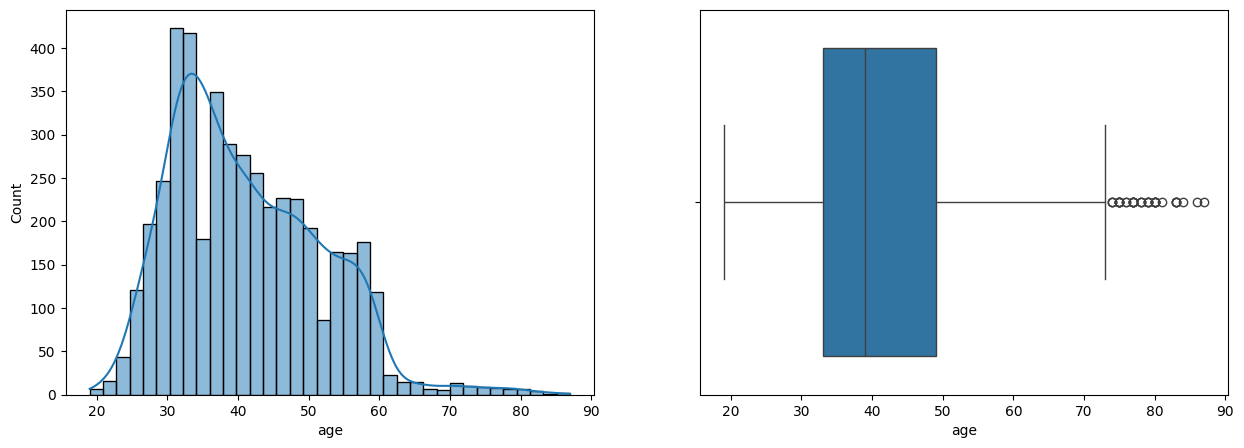

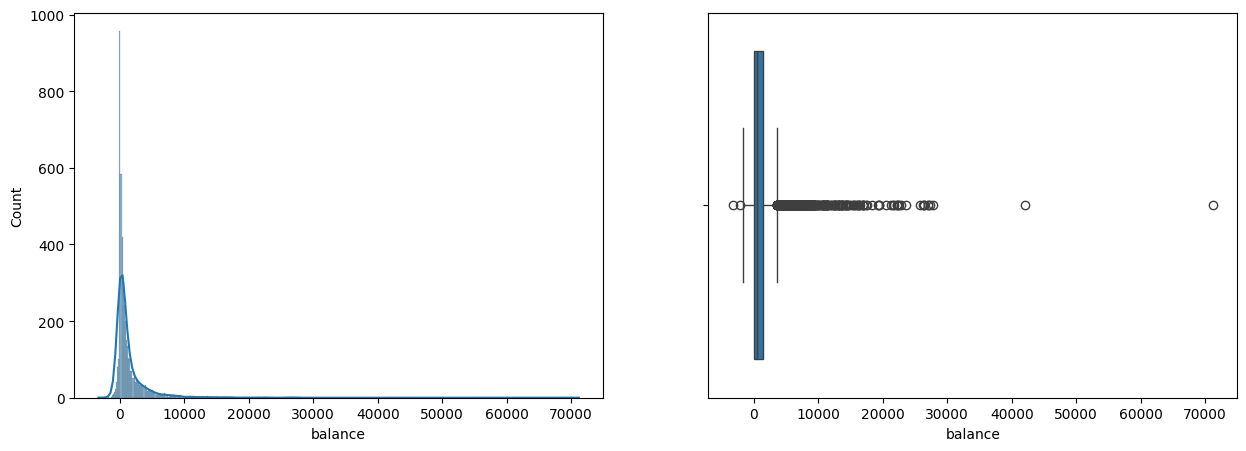

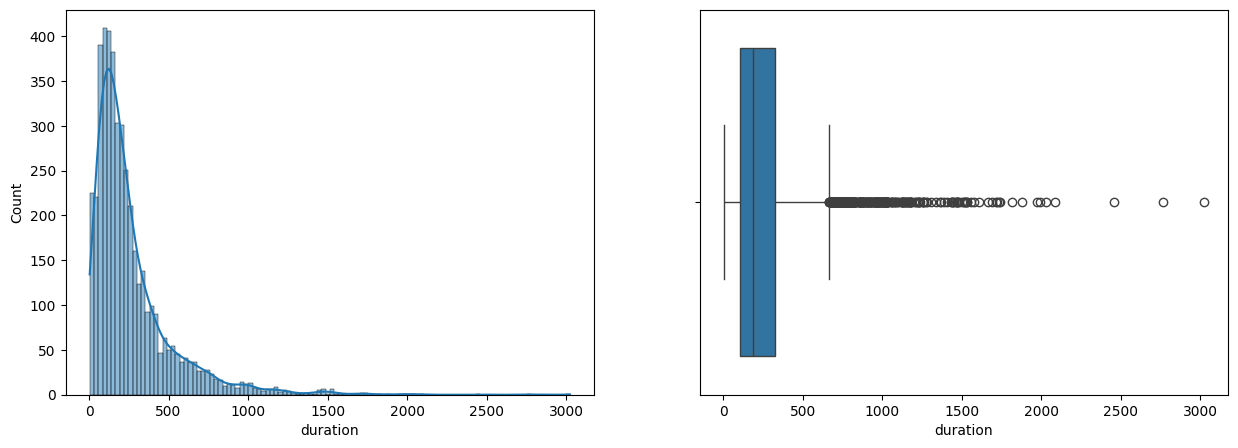

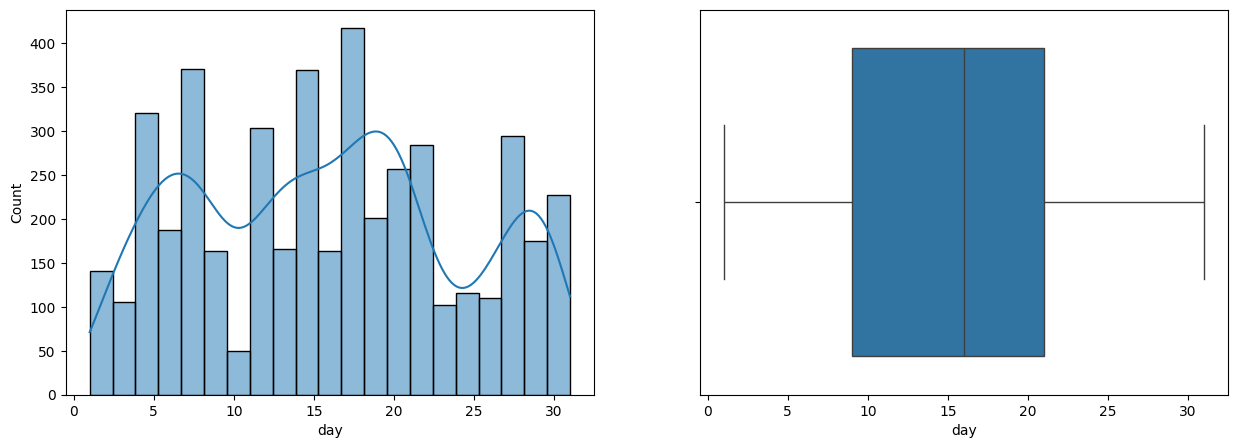

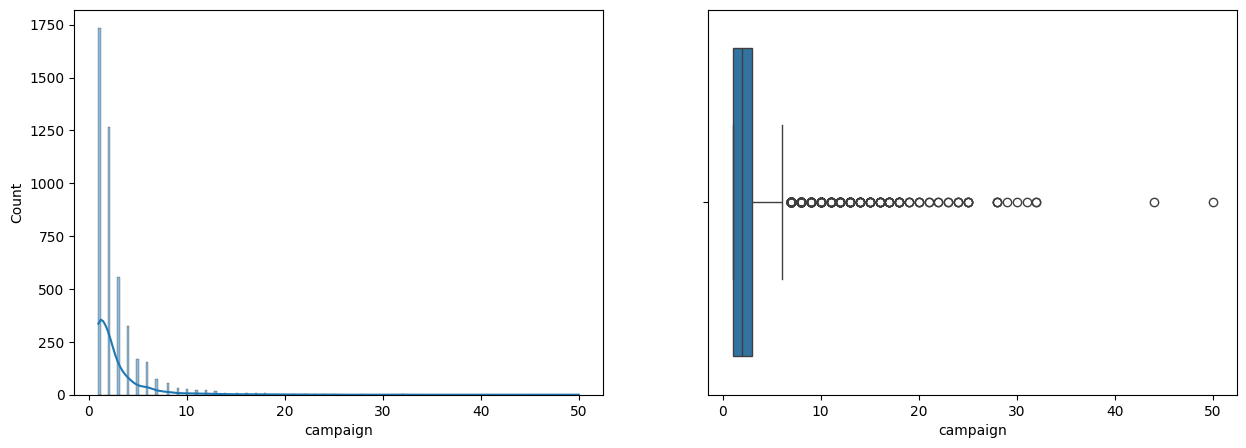

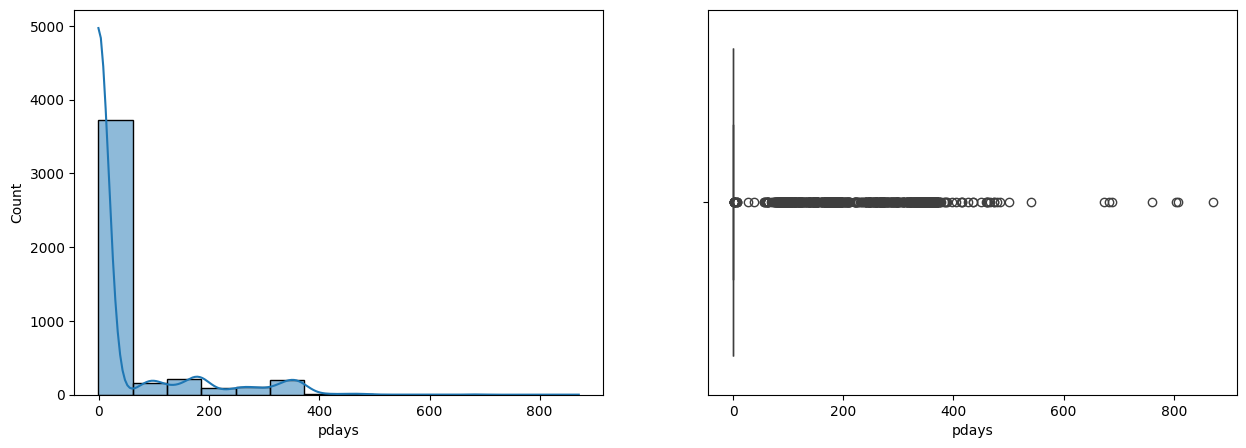

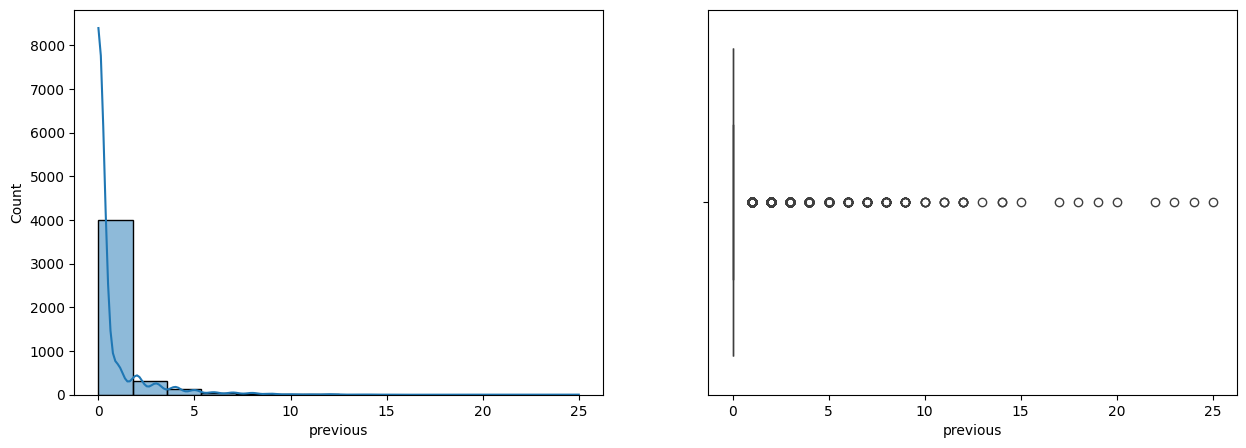

In [ ]:
for col in numerical_columns:
    draw_histogram_and_boxplot(col)

In [ ]:
from scipy import stats
columns_to_check = ['age', 'balance','duration','day','campaign','pdays','previous']
z_scores = np.abs(stats.zscore(df[columns_to_check]))
z_score_threshold = 3
outliers = (z_scores > z_score_threshold).any(axis=1)
print("Rows with outliers:")
print(df[outliers])
df = df[~outliers]
print("\nDataFrame without outliers:")
print(df.head(5))

Rows with outliers:
      age           job   marital  education default  balance housing loan  \
36     78       retired  divorced    primary      no      229      no   no   
38     33    management   married  secondary      no     3935     yes   no   
39     23      services    single   tertiary      no      363     yes   no   
40     38    management    single   tertiary      no    11971     yes   no   
51     37    technician    single  secondary      no      228     yes   no   
...   ...           ...       ...        ...     ...      ...     ...  ...   
4495   48    management   married   tertiary      no     1175     yes   no   
4504   42   blue-collar    single  secondary      no     1080     yes  yes   
4505   32        admin.    single  secondary      no      620     yes   no   
4511   46   blue-collar   married  secondary      no      668     yes   no   
4520   44  entrepreneur    single   tertiary      no     1136     yes  yes   

        contact  day  ... marital_LabelEnco

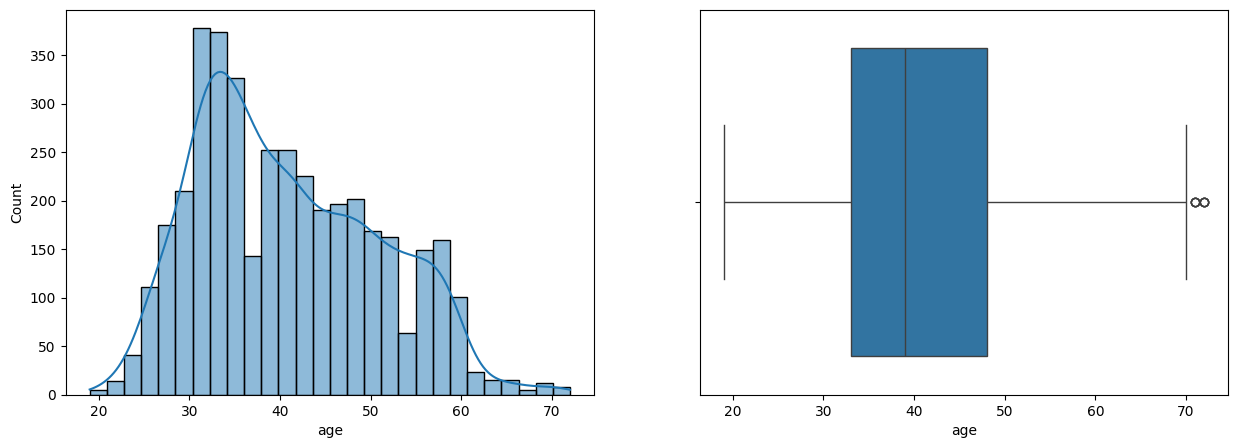

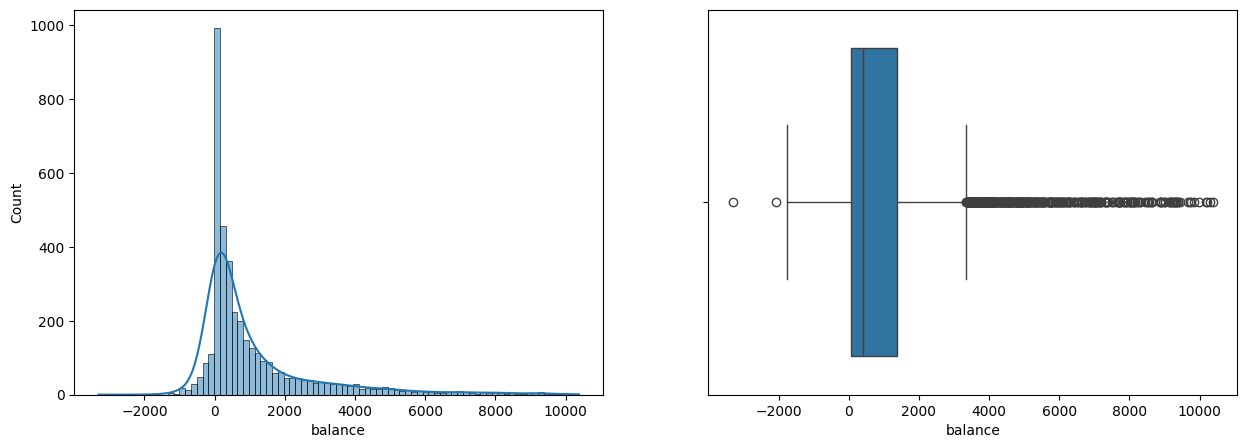

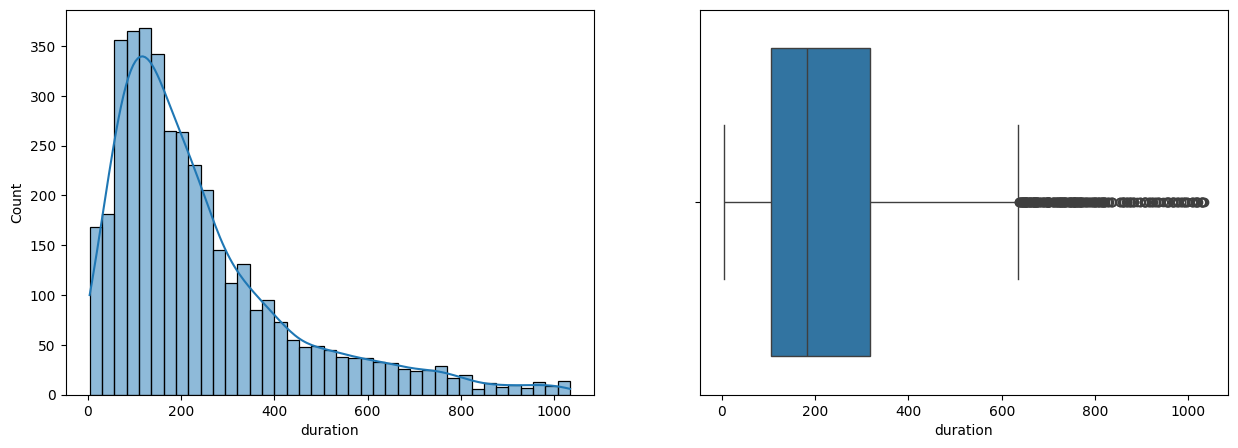

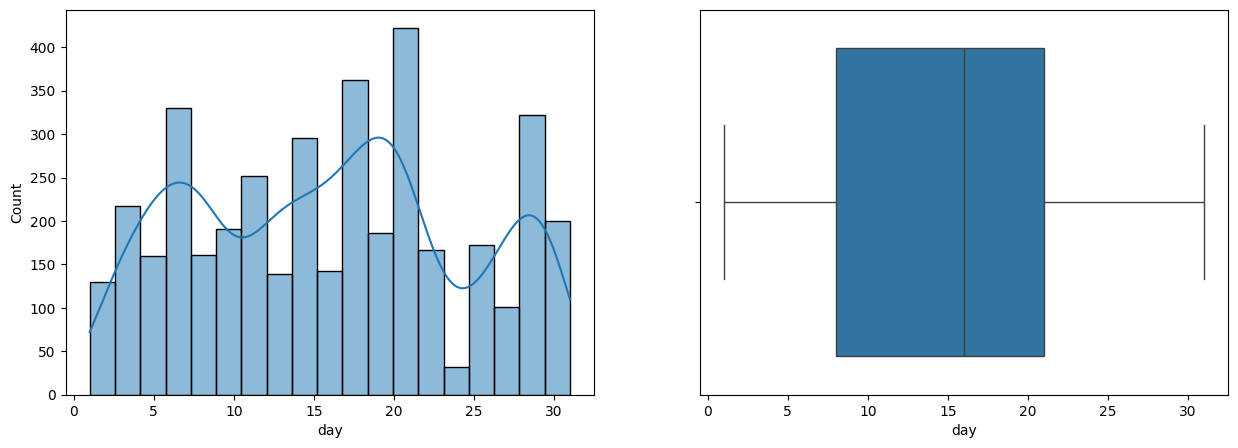

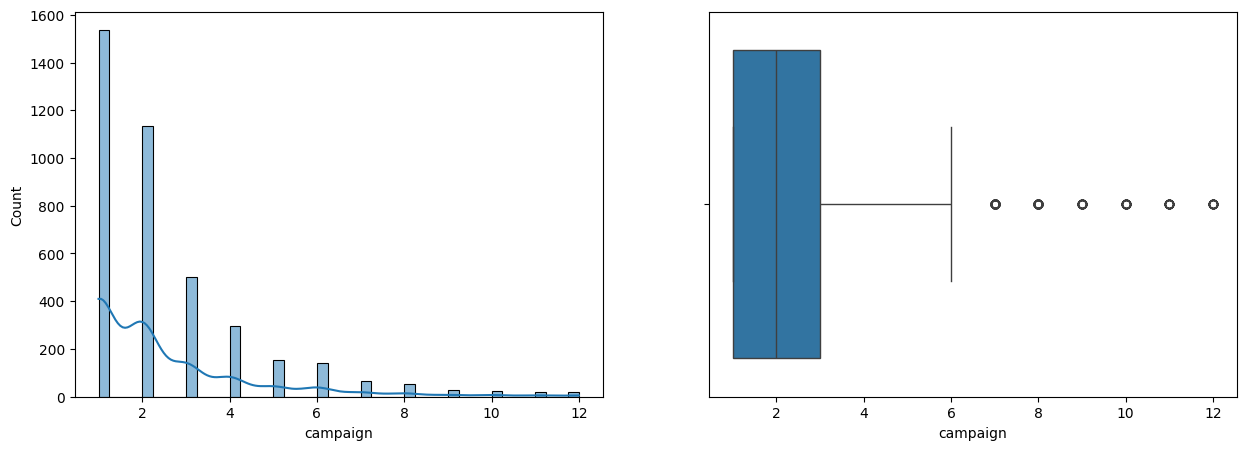

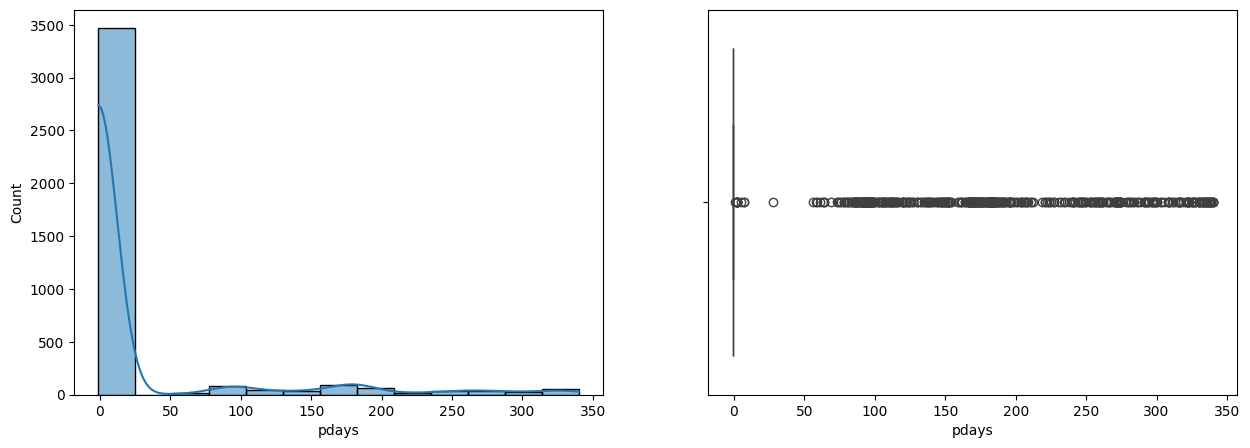

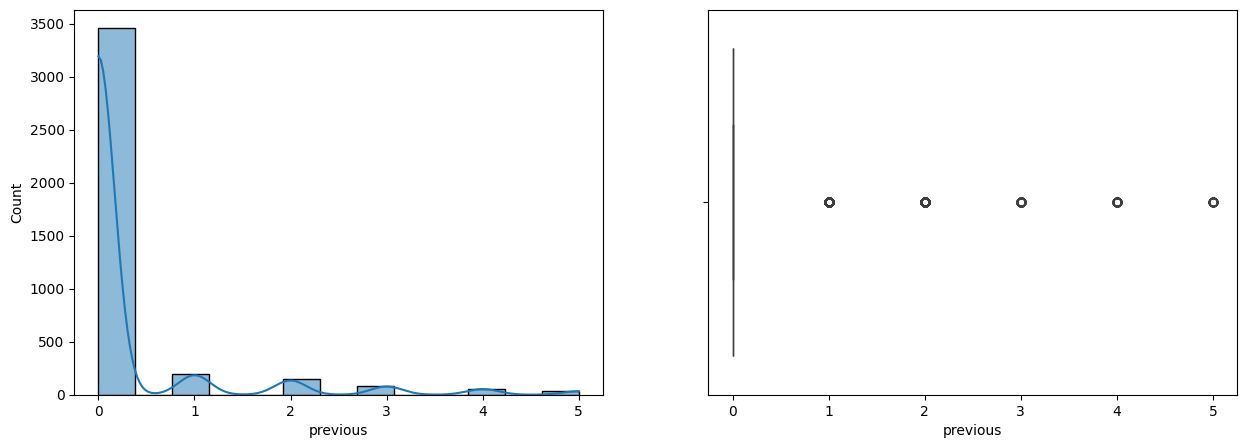

In [ ]:
for col in numerical_columns:
    draw_histogram_and_boxplot(col)

In [ ]:
df.shape

(3980, 27)

In [ ]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


### 4. Descriptive Statistics (10 marks)
- Generate summary statistics for numerical variables.
- Provide insights on the distribution of key variables.

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,marital_LabelEncoder,education_LabelEncoder,default_LabelEncoder,housing_LabelEncoder,loan_LabelEncoder,contact_LabelEncoder,month_LabelEncoder,poutcome_LabelEncoder,job_LabelEncoder,y_LabelEncoder
count,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000
mean,40.844724,1112.654020,15.983417,242.791960,2.508543,23.390201,0.289698,1.142462,1.230653,0.018090,0.562312,0.159296,0.682663,5.484422,2.683668,4.419598,0.100754
std,9.995350,1766.731815,8.300115,199.063971,2.009572,69.558521,0.872491,0.599536,0.749677,0.133295,0.496164,0.365998,0.916494,2.989133,0.861149,3.284120,0.301040
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,61.000000,8.000000,105.000000,1.000000,-1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,1.000000,0.000000
50%,39.000000,415.500000,16.000000,183.000000,2.000000,-1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000,4.000000,0.000000
75%,48.000000,1373.500000,21.000000,317.000000,3.000000,-1.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,8.000000,3.000000,7.000000,0.000000
max,72.000000,10378.000000,31.000000,1034.000000,12.000000,340.000000,5.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,11.000000,3.000000,11.000000,1.000000


In [ ]:

# AGE: Range from 19 to 87, with an average of about 41.2 years. It is slightly reight skewed

# BALANCE: Huge range from -3,313 to 71,188. The mean is 1,423, but the standard deviation is quite large 3,010.

# DAY: Refers to the last contact day of the month (1-31),it is evenly spread with the median at 16.

# DURATION: Call duration ranges from 4 to 3,025 seconds. The mean is 264 seconds, but the distribution is right skewed

# CAMPAIGN: Number of contacts during the campaign ranges from 1 to 50. Most clients were contacted 1–3 times

# PDAYS: It is the days since the client was last contacted. A lot of -1 values, meaning never contacted before

# PREVIOUS: Number of contacts performed before this campaign — most clients weren’t contacted before

### 5. Univariate Analysis (10 marks)
- Perform and visualize univariate analysis on each column separately.
- Use histograms, boxplots, and value counts where applicable.

<Axes: xlabel='age'>

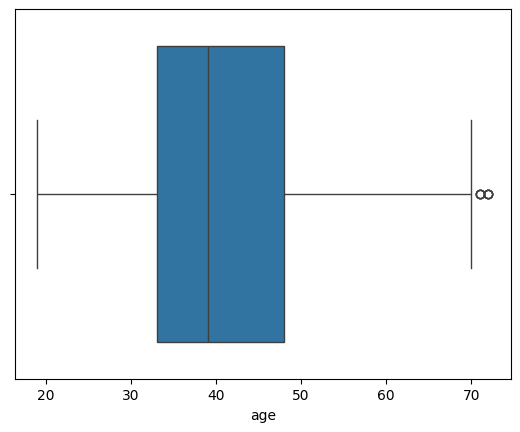

In [ ]:
# age

sns.boxplot(data=df,x='age')

In [ ]:
# Observations
# the age is in the range of 20 to 74
# most of the values are in the range 30 to 50

,proportion
job,
management,21.331658
blue-collar,21.231156
technician,17.361809
admin.,10.678392
services,9.396985
retired,4.296482
self-employed,4.020101
entrepreneur,3.668342
unemployed,2.914573


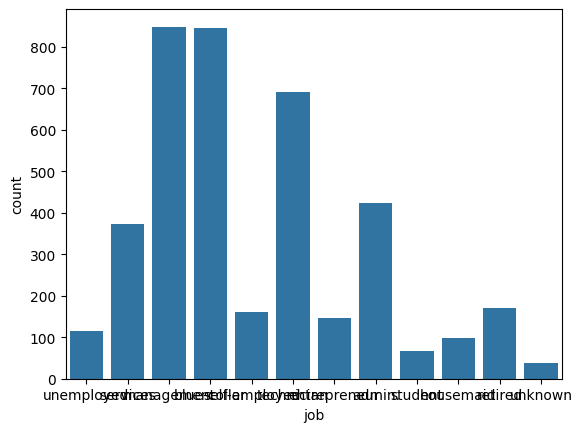

In [ ]:
# job

sns.countplot(data=df,x='job')
df['job'].value_counts(normalize=True)*100

In [ ]:
# Observations
# In the data 21% of the people are doing management job,20% are doing blue collar job,16% are technicians,10% are admins
# And the remaining 33% people have different kind of jobs
# most of the people are doing management job

,proportion
marital,
married,62.035176
single,26.105528
divorced,11.859296


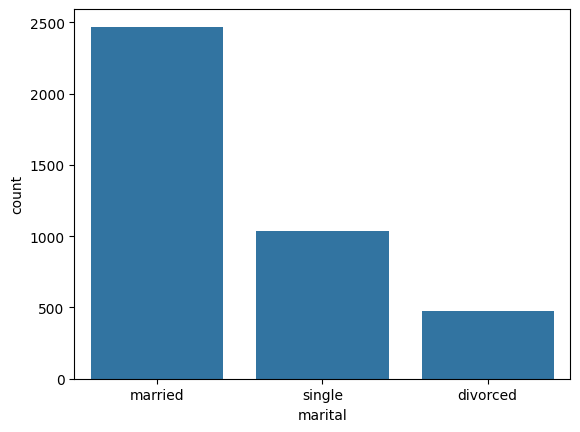

In [ ]:
# marital

sns.countplot(data=df,x='marital')
df['marital'].value_counts(normalize=True)*100

In [ ]:
# observations
# In the dataset 62% people are married,26% people are single amd 11% are divorced
# Mount of the data count in the data set are married

,proportion
education,
secondary,51.231156
tertiary,29.547739
primary,14.974874
unknown,4.246231


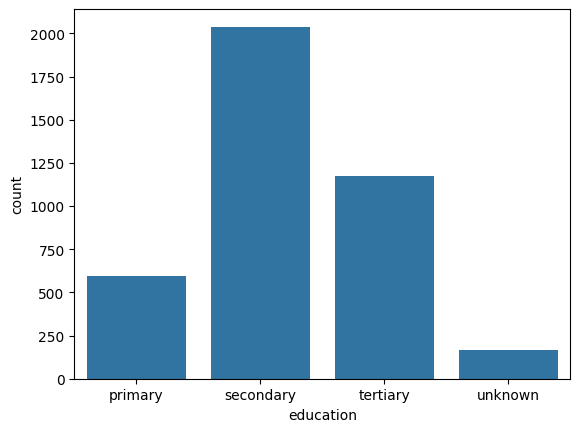

In [ ]:
# education

sns.countplot(data=df,x='education')
df['education'].value_counts(normalize=True)*100

In [ ]:
# Observations
# Most of the people in the data are completed there secondary education that is 51%
# 26% of the data completed there teritiary education,14% people completed there primary education and 4% of the people are unknown that is no information about the education

,proportion
default,
no,98.190955
yes,1.809045


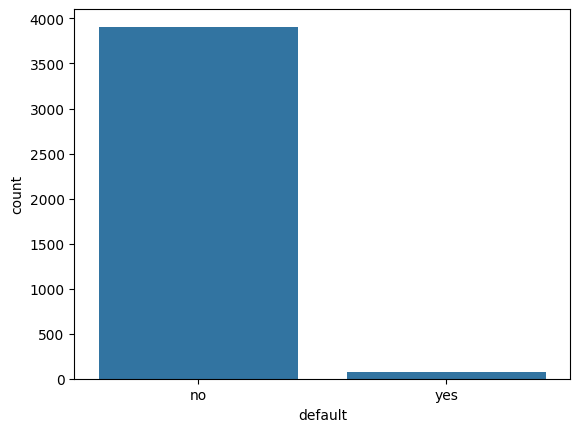

In [ ]:

# default

sns.countplot(data=df,x='default')
df['default'].value_counts(normalize=True)*100

In [ ]:
# observations
# 98% of the the data has no credit in default is
# 1.8% of the data has credit with default

<Axes: xlabel='balance'>

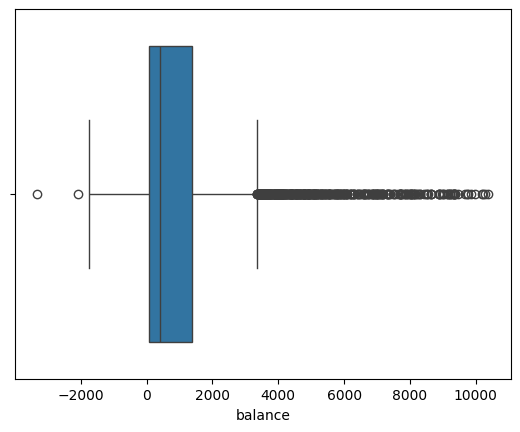

In [ ]:
# balance

sns.boxplot(data=df,x='balance')

In [ ]:
# Observations
# The people in the dataset has the range below 0 and nearly 5000
# most of the data is in range 0 to 2000
# there are outliers that id some people have high bank balance
# there are people even with negative bank balance

,proportion
housing,
yes,56.231156
no,43.768844


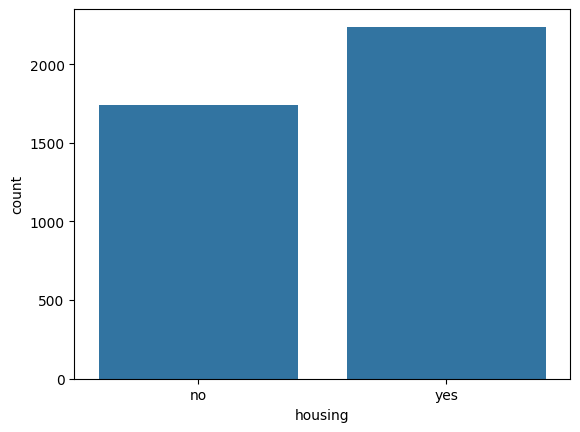

In [ ]:
# housing

sns.countplot(data=df,x='housing')
df['housing'].value_counts(normalize=True)*100

In [ ]:
# Observations
# In the given dataset 56% of the people has house loan
# 43% of the dataset doesnot have a house loan

,proportion
loan,
no,84.070352
yes,15.929648


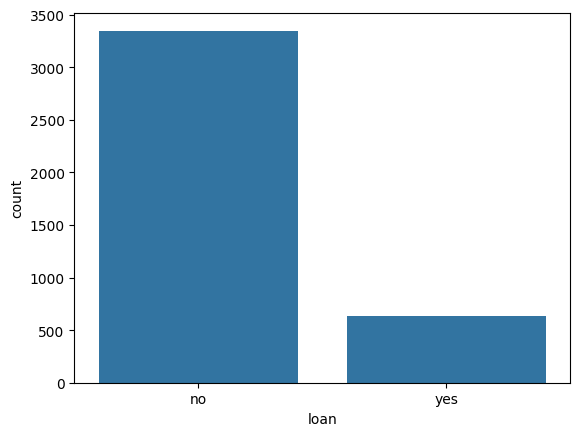

In [ ]:
# loan

sns.countplot(data=df,x='loan')
df['loan'].value_counts(normalize=True)*100

In [ ]:
# Obsarvations
# 84% of the people in the data set doesn't have a personal loan
# only 15% of the people in the dataset has personal loan

,proportion
contact,
cellular,62.889447
unknown,31.155779
telephone,5.954774


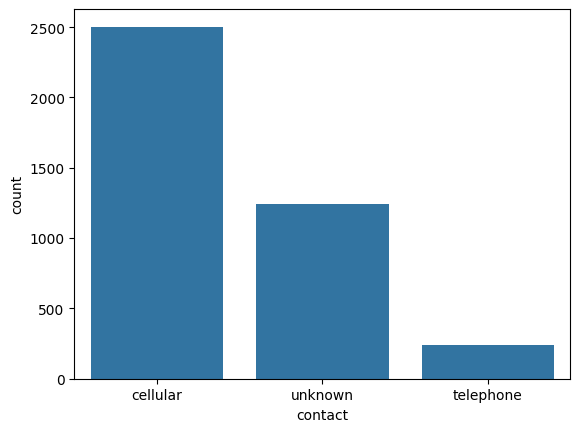

In [ ]:
# contact

sns.countplot(data=df,x='contact')
df['contact'].value_counts(normalize=True)*100

In [ ]:
# Observations
# most of the people in the data that is 62% of the people has cellular contact
# 31 % of the people has no contact ,5% of the people has telephone contact

,proportion
day,
20,5.954774
18,4.748744
19,4.673367
21,4.648241
17,4.346734
7,4.296482
28,4.070352
8,4.045226
29,4.020101


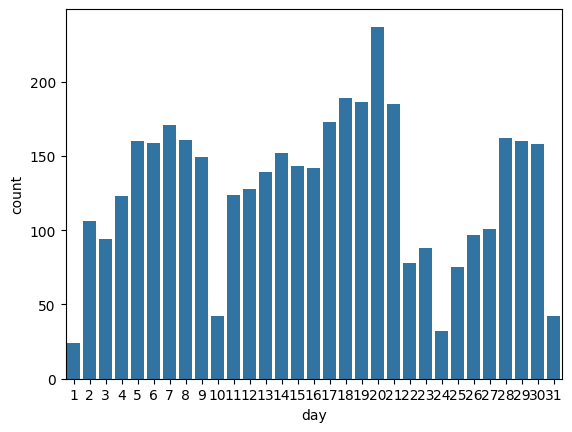

In [ ]:
# day

sns.countplot(data=df,x='day')
df['day'].value_counts(normalize=True)*100

In [ ]:
# Oservations
# 5% of the people has the last contact of the month as 20
# there are more number of people with 4% has the last contact day of the month as 18,19,21,14,17,7,6,28,5
# 3%,2% and 1% people have remaining dates as the last contact day of the month
# Least priority last contact day of the month is 1 with 0.59%

,proportion
month,
may,29.949749
jul,16.306533
aug,14.170854
jun,12.035176
nov,8.718593
apr,6.557789
feb,5.125628
jan,3.316583
oct,1.457286


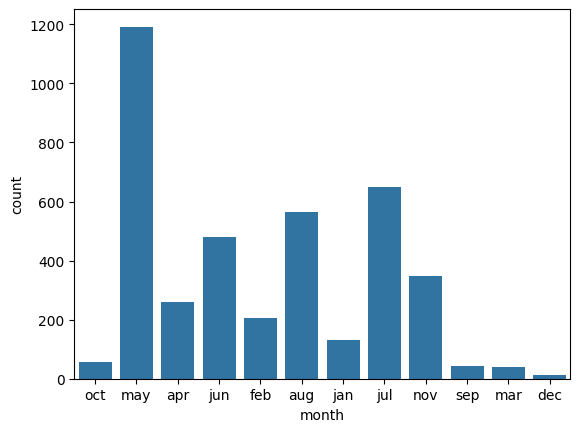

In [ ]:
# month

sns.countplot(data=df,x='month')
df['month'].value_counts(normalize=True)*100

In [ ]:
# Oservations
# 29% of the people in the data with last contact month in the year is may
# 16% of the people in the data with last contact month in the year is july and 14% is may
# the least priority of the month is december with 0.4%

<Axes: xlabel='duration'>

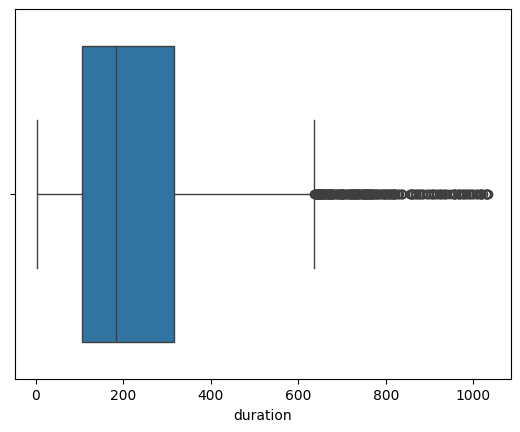

In [ ]:
# duration

sns.boxplot(data=df,x='duration')

In [ ]:
# Observations
# this plot tells us the last contact duration in seconds
# most of the duration is in the range of 100 to 300 seconds
# there are outiers with high call duration

,proportion
campaign,
1,38.592965
2,28.542714
3,12.562814
4,7.487437
5,3.894472
6,3.567839
7,1.683417
8,1.306533
9,0.703518


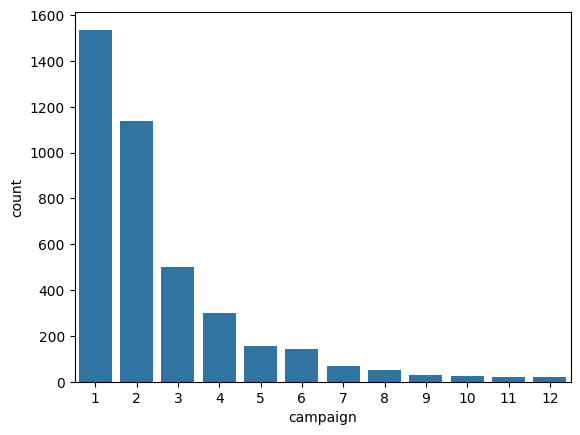

In [ ]:
# campaign

sns.countplot(data=df,x='campaign')
df['campaign'].value_counts(normalize=True)*100

In [ ]:
# Observations
# from the above plot most of the proportions that is 38% of the people in the data only conacted once
# 28% 2 times and  the numbers of times that people contacted decreased after 3 that is 12%
# very few clients has more than 5 contacts

In [ ]:
# pdays

df['pdays'].value_counts(normalize=True)*100

,proportion
pdays,
-1,86.884422
183,0.452261
182,0.427136
92,0.251256
169,0.251256
...,...
76,0.025126
286,0.025126
219,0.025126


In [ ]:
# observations
# -1 says that client was never contacted beore  not contacted  it is 86%
# 0.4% of people from total data has contacted after 182 days of last contact
# There are people with less than 0.4 who has contacted more than 183 days after the last contact

,proportion
previous,
0,86.884422
1,5.000000
2,3.643216
3,2.110553
4,1.457286
5,0.904523


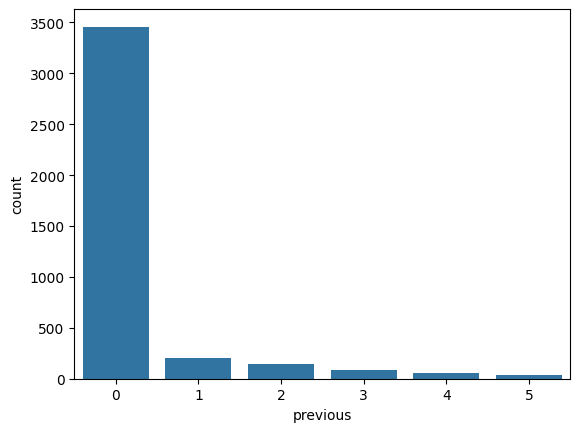

In [ ]:
# previous

sns.countplot(data=df,x='previous')
df['previous'].value_counts(normalize=True)*100

In [ ]:
# observations
# from this plot we say that the number of contacts performed beform this campaign and for this client
# most of the people from the data 81% of the people has never contacted before the campaign
# around 6.3% had one previous contact ,4% had  2 contacts and 2.4% had 3 contacts
# gradually the number of clients ae decreasing

,proportion
poutcome,
unknown,86.884422
failure,7.738693
other,3.040201
success,2.336683


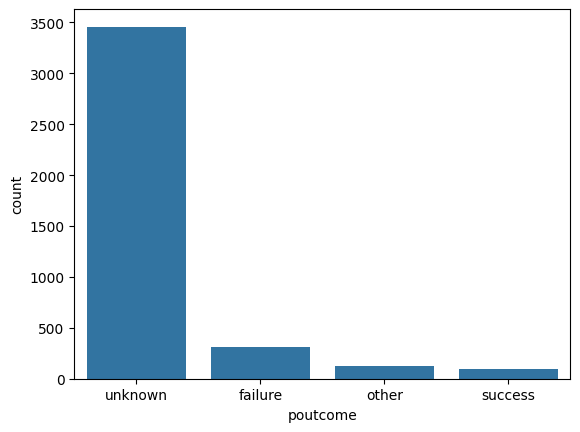

In [ ]:
# poutcome

sns.countplot(data=df,x='poutcome')
df['poutcome'].value_counts(normalize=True)*100

In [ ]:
# Observations
# this plot says that the outcome of the previous marketing campagin
# 86% of the previous campaign is unknown
# 7% is failure rate and only 2% is success for previous marketing campaign

### 6. Bivariate Analysis (10 marks)
- Analyze the relationship of each independent variable with the target variable.
- Use scatter plots, bar plots, and box plots for visualization.

<Axes: xlabel='age'>

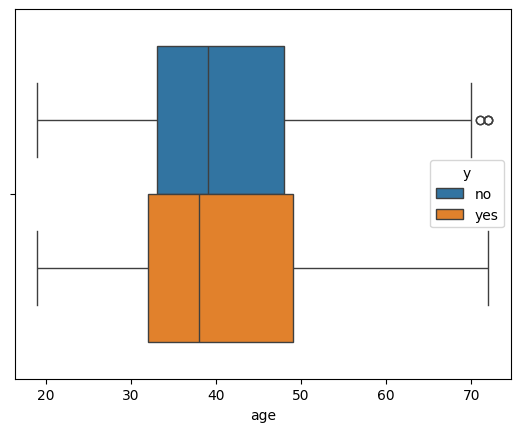

In [ ]:
# age vs y

sns.boxplot(data=df,x='age',hue='y')

In [ ]:
# Observation
# People who said yes are mostly between 30 to 50,and who said no are between 35 to 57 approx
#

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'unemployed'),
  Text(1, 0, 'services'),
  Text(2, 0, 'management'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'self-employed'),
  Text(5, 0, 'technician'),
  Text(6, 0, 'entrepreneur'),
  Text(7, 0, 'admin.'),
  Text(8, 0, 'student'),
  Text(9, 0, 'housemaid'),
  Text(10, 0, 'retired'),
  Text(11, 0, 'unknown')])

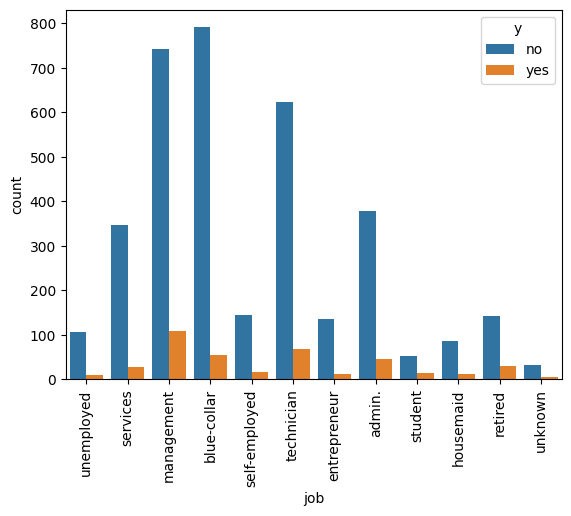

In [ ]:
# job vs y

sns.countplot(data=df,x='job',hue='y')
plt.xticks(rotation=90)

In [ ]:
# observation
# more number of yes are from management and no are from bluecollar jobs

<Axes: xlabel='marital', ylabel='count'>

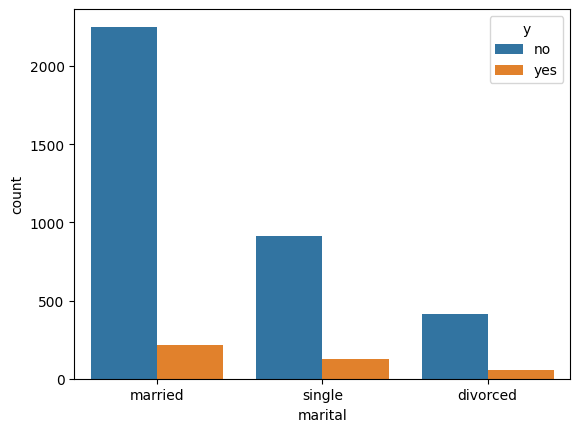

In [ ]:
# marital vs y

sns.countplot(data=df, x="marital", hue="y")


In [ ]:
df.groupby('marital')['y'].value_counts(normalize=True)*100

marital   y  
divorced  no     87.711864
          yes    12.288136
married   no     91.211017
          yes     8.788983
single    no     87.872955
          yes    12.127045
Name: proportion, dtype: float64

In [ ]:
# observations
# from above plot from total 100% of divorced people 87.7% said no and 12.2% said yes
# In married plot 91.2% said no and 8.7 % said yes
# In singles 87.8% said no and 12.1% said yes

<Axes: xlabel='education', ylabel='count'>

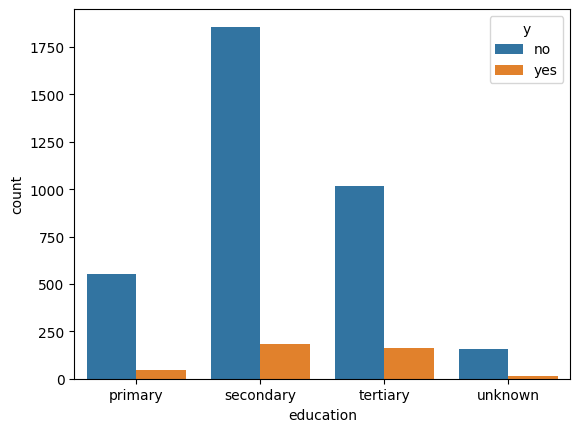

In [ ]:
# education vs y

sns.countplot(data=df,x='education',hue='y')

In [ ]:

# observation
# Mostly equal number of yes from people in secondary and tertiary education
# More number of people in secondary education said no

default  y  
no       no     89.943705
         yes    10.056295
yes      no     88.888889
         yes    11.111111
Name: proportion, dtype: float64

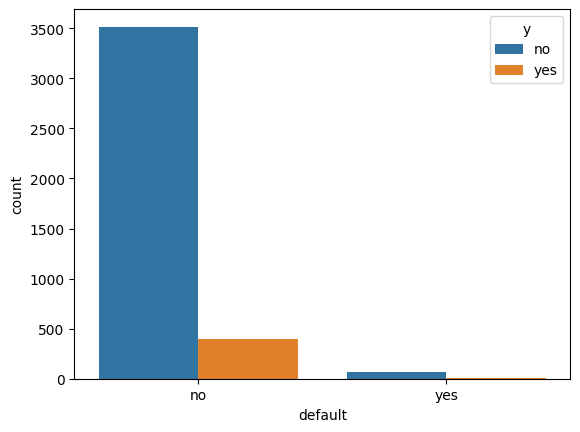

In [ ]:
# default vs y
sns.countplot(data=df,x='default',hue='y')
df.groupby('default')['y'].value_counts(normalize=True)*100

In [ ]:
# observation
# from default no 89% are no 10% are yes
# from default yes 88% are no 11% are yes

<Axes: xlabel='balance'>

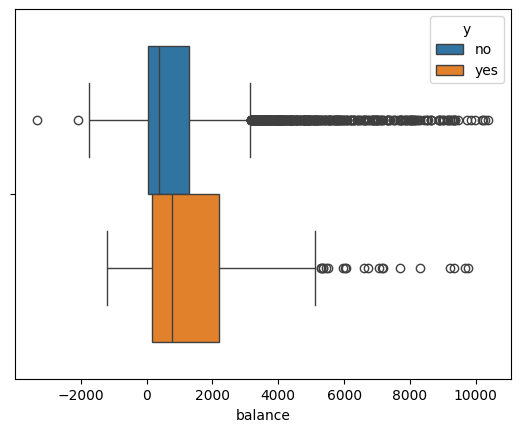

In [ ]:

# balance vs y
sns.boxplot(data=df,x='balance',hue='y')

In [ ]:
# observation
# people who said yes have higher balance compared to people eho said no
# the median balance for yes is more
# there are more outliers in no compared to yes

<Axes: xlabel='housing', ylabel='count'>

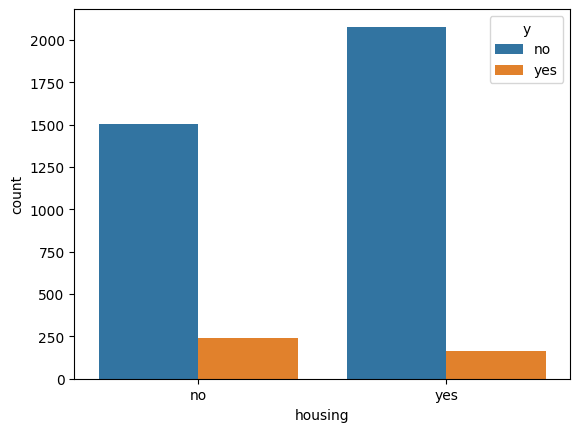

In [ ]:
# housing vs y
sns.countplot(data=df,x='housing',hue='y')

In [ ]:
# observation
# # most of the people who don't have housing loans said yes
# most of the people with housing loans said no
# we can say that having house loans is inersely proportional to saying to y

<Axes: xlabel='loan', ylabel='count'>

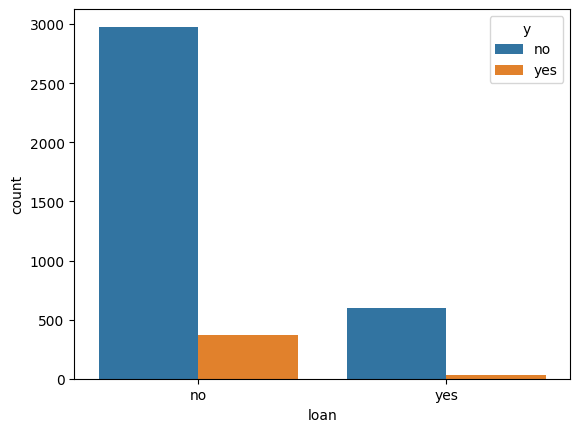

In [ ]:
# loan vs y
sns.countplot(data=df,x='loan',hue='y')

In [ ]:
# observation
# most of the people who don't have  loans said yes
# most of the people with loans said no
# we can say that having loans is inersely proportional to saying to y

<Axes: xlabel='contact', ylabel='count'>

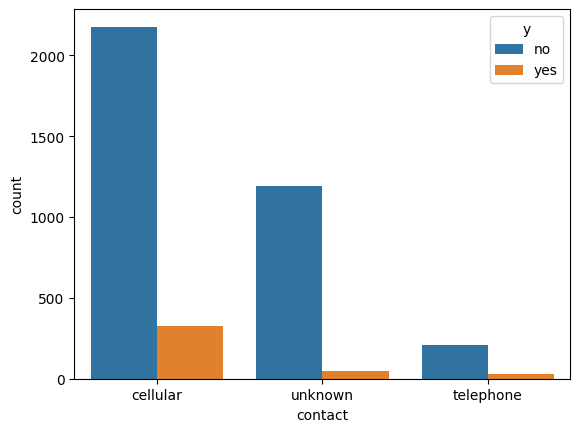

In [ ]:
# contact vs y
sns.countplot(data=df,x='contact',hue='y')

In [ ]:
# observation
# most of the people who said yes are contacted from cellular
# very few people said yes contacted through unknown and telephone
# cellular contact is more effective

<Axes: xlabel='day', ylabel='y'>

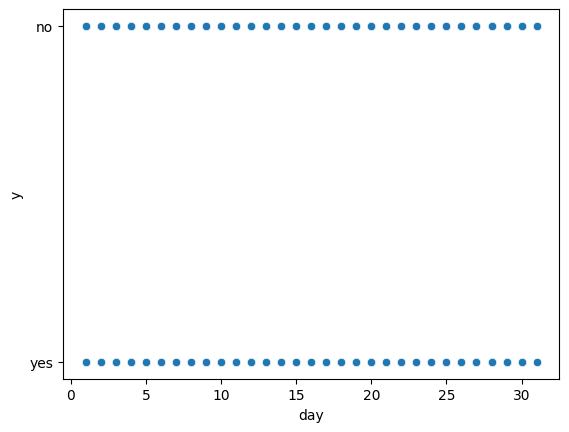

In [ ]:
# day vs y
sns.scatterplot(data=df,x='day',y='y')

In [ ]:
# observation
# people who said yes are in all the dates and also no was also in all the days

<Axes: xlabel='month', ylabel='count'>

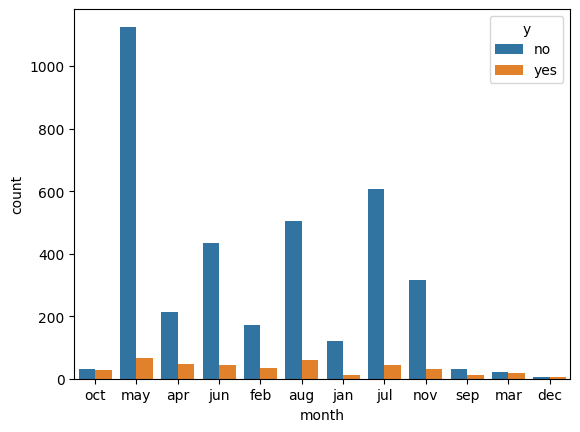

In [ ]:
# month vs y
sns.countplot(data=df,x='month',hue='y')

In [ ]:
# observation
# people who said yes are more in may and then followed by august
# people who said yes are less in december

<Axes: xlabel='duration', ylabel='y'>

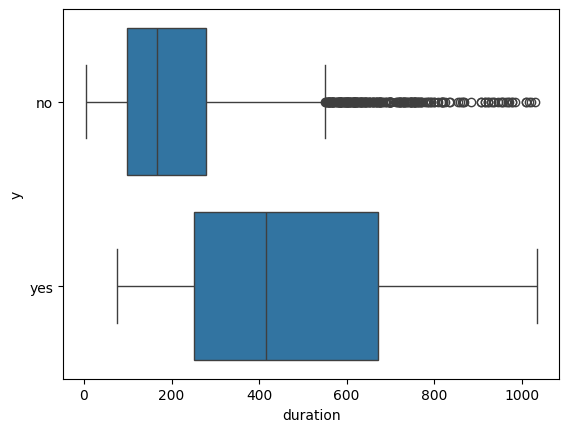

In [ ]:
# duration vs y
sns.boxplot(data=df,x='duration',y='y')

In [ ]:
# observation
# most of the poeple who said yes are more likely to have higher duration than people who said no
# we can say that the duration is directly proportion to to the yes

<Axes: xlabel='campaign', ylabel='count'>

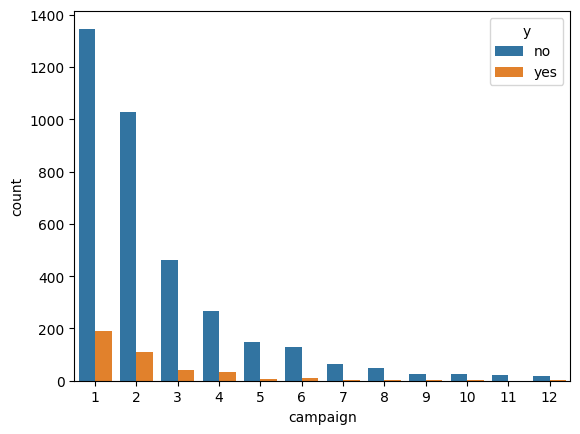

In [ ]:
# campaign vs y
sns.countplot(data=df,x='campaign',hue='y')

In [ ]:
# observation
# most of the people who said yes are with campaign 1 and the next follows 2
# campaign and y are directly proportional

<Axes: xlabel='pdays'>

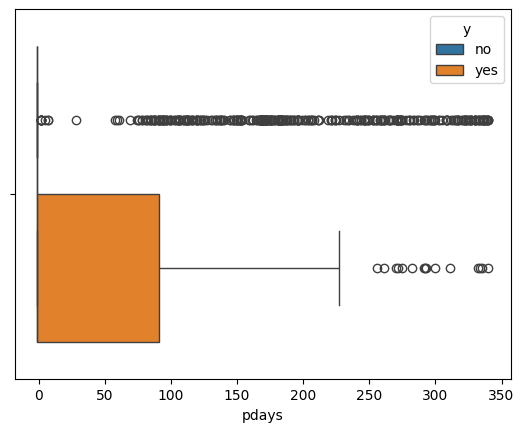

In [ ]:
# pdays bs y
sns.boxplot(data=df,x='pdays',hue='y')

In [ ]:
# observation
# most of the people who said yes are with high pdays
# with who said no are with very less pdays
# there are outliers on both yes and no but more in no

<Axes: xlabel='previous', ylabel='count'>

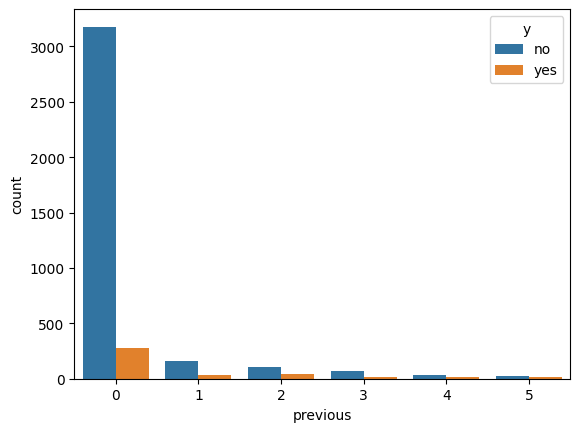

In [ ]:
# previous vs y
sns.countplot(data=df,x='previous',hue='y')

In [ ]:
# observation
# most of the people who said yes are with previous o
# it is inversely proportional to y

<Axes: xlabel='poutcome', ylabel='count'>

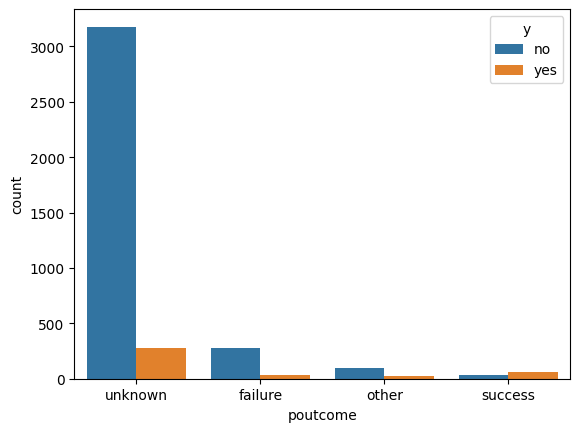

In [ ]:
# poutcome vs y

sns.countplot(data=df,x='poutcome',hue='y')

In [ ]:
# observation
# people who said yes are with unknown poutcome
# people with failure ,other, and success are less likely to say yes

### 7. Multivariate Analysis (10 marks)
- Check for correlations between numerical features.
- Perform pairwise analysis using pair plots or correlation matrices.

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'marital_LabelEncoder',
       'education_LabelEncoder', 'default_LabelEncoder',
       'housing_LabelEncoder', 'loan_LabelEncoder', 'contact_LabelEncoder',
       'month_LabelEncoder', 'poutcome_LabelEncoder', 'job_LabelEncoder',
       'y_LabelEncoder'],
      dtype='object')

In [ ]:
X = df.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','y'])
sns.pairplot(df[['age','balance','duration','day','campaign','pdays','previous','marital_LabelEncoder','education_LabelEncoder','default_LabelEncoder','housing_LabelEncoder','loan_LabelEncoder','contact_LabelEncoder','month_LabelEncoder','poutcome_LabelEncoder','job_LabelEncoder','y_LabelEncoder']], hue='y_LabelEncoder')
plt.show()

### 8. Heatmap & Correlation Analysis (10 marks)
- Generate a heatmap to visualize feature correlations.
- Interpret the results to understand feature dependencies.

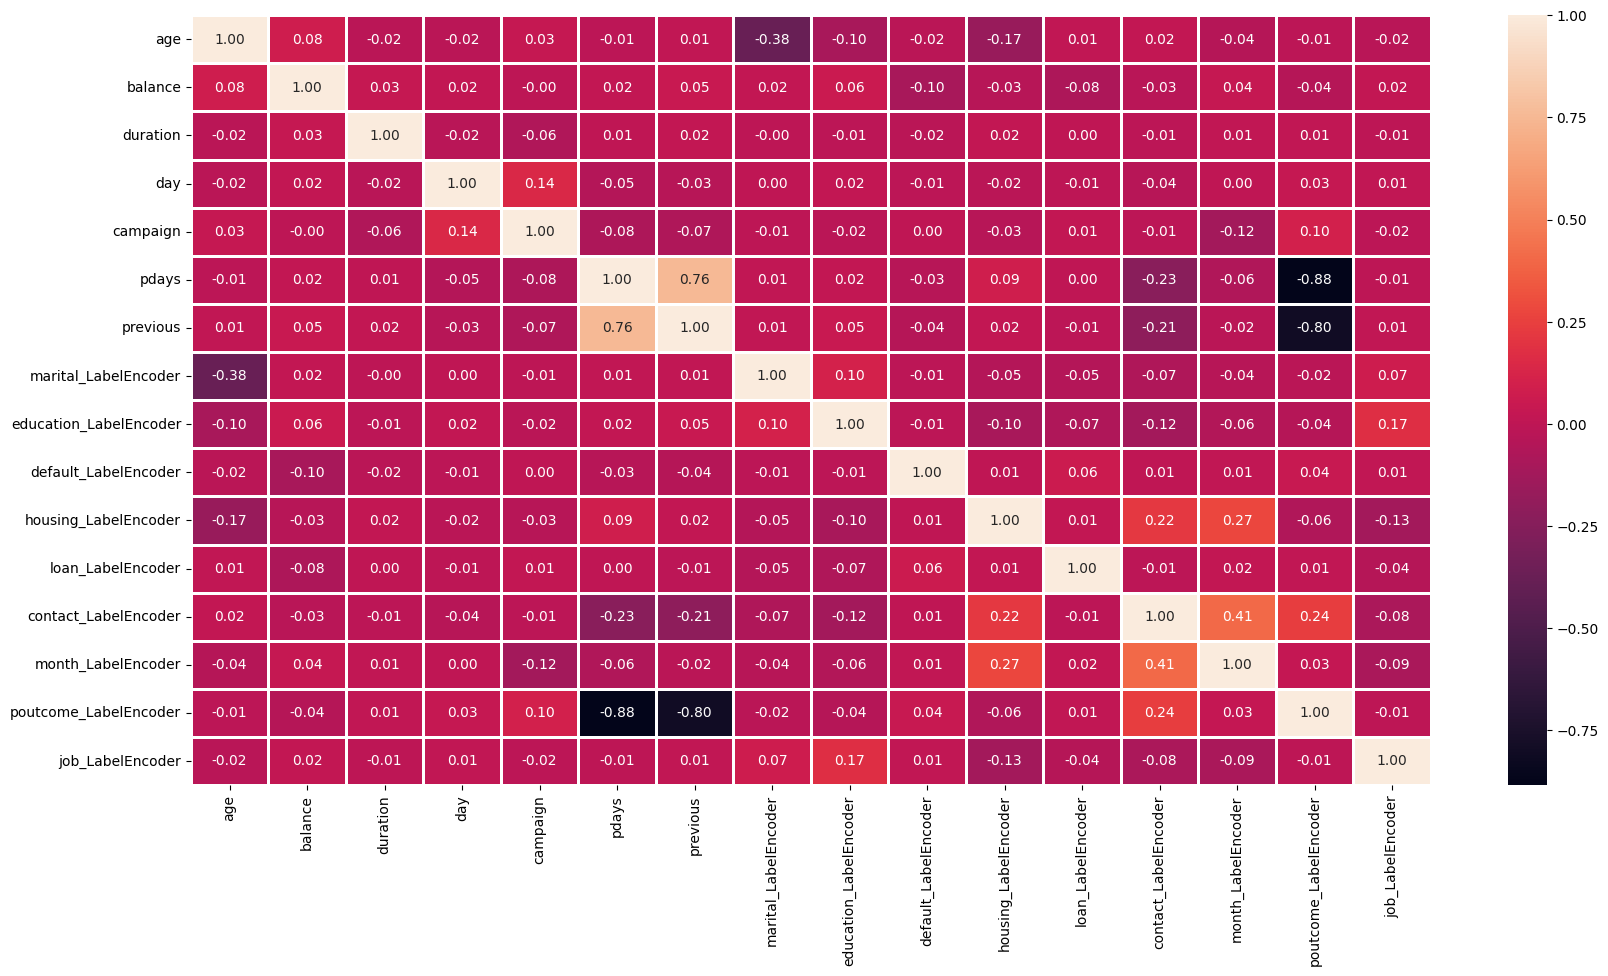

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df[['age','balance','duration','day','campaign','pdays','previous','marital_LabelEncoder','education_LabelEncoder','default_LabelEncoder','housing_LabelEncoder','loan_LabelEncoder','contact_LabelEncoder','month_LabelEncoder','poutcome_LabelEncoder','job_LabelEncoder']].corr(), annot=True, linewidths=1, fmt=".2f")
plt.show()

### 9. Build Logistic Regression Model (15 marks)
- Split the data into training and testing sets.
- Train a logistic regression model on the training data.
- Display the model coefficients and intercept.

In [ ]:
df.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'], inplace=True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,marital_LabelEncoder,education_LabelEncoder,default_LabelEncoder,housing_LabelEncoder,loan_LabelEncoder,contact_LabelEncoder,month_LabelEncoder,poutcome_LabelEncoder,job_LabelEncoder,y_LabelEncoder
0,30,1787,19,79,1,-1,0,1,0,0,0,0,0,10,3,10,0
1,33,4789,11,220,1,339,4,1,1,0,1,1,0,8,0,7,0
2,35,1350,16,185,1,330,1,2,2,0,1,0,0,0,0,4,0
3,30,1476,3,199,4,-1,0,1,2,0,1,1,2,6,3,4,0
4,59,0,5,226,1,-1,0,1,1,0,1,0,2,8,3,1,0


In [ ]:
X = df.drop(columns=['y_LabelEncoder'])

y = df['y_LabelEncoder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

### 11. Interpretation of Metrics (10 marks)
- Analyze the model's performance based on the evaluation metrics.
- Explain any trade-offs observed in precision and recall.


**From the classification report **

** class 0**

     -precision =0.93

     -recall= 0.99

     -F1 score = 0.96


**class 1**

     -precison = 0.60

     -recall = 0.21

     -F1 score = 0.31
     

**over all accuracy** = 0.922

### 10. Model Evaluation (10 marks)
- Generate the confusion matrix.
- Compute accuracy, precision, recall, and F1-score.
- Interpret the classification report.

In [ ]:
y_pred = model.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[709  11]
 [ 55  21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       720
           1       0.66      0.28      0.39        76

    accuracy                           0.92       796
   macro avg       0.79      0.63      0.67       796
weighted avg       0.90      0.92      0.90       796

Accuracy Score: 0.9170854271356784



### 12. Final Conclusion (5 marks)
- Summarize the key findings from the analysis.
- Provide suggestions for potential improvements or alternative approaches.

---

In [ ]:
# The logistic regression model achieved a hih accuracy of 92%
# The model worked very well in class 0 with high precision and recall
# Where as the model didnot perform well in class 1